## Predicción Hipertensión

Vamos a tratar de predecir si una persona padece o no de hipertensión mediante un modelo Random Forest.

### Importación de librerías

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

### Carga de datos

In [57]:
data = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/PYTHON PROJECTS/PROYECTOS/Estudio predicción Hipertensión/hypertension_dataset.csv")
data.head()

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


In [58]:
data.columns

Index(['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

Vamos a eliminar las variables de nivel de educación, el estado laboral y el país para reducir un poco el dataset.

In [60]:
data.drop(["Education_Level","Employment_Status","Country"],axis=1,inplace=True)
data.head()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,Diabetes,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Hypertension
0,58,29.5,230,160,79,Never,27.9,Low,Yes,Yes,9,14.7,6.1,80,100,75,72,179,Female,High
1,34,36.2,201,120,84,Never,27.5,High,Yes,Yes,6,10.8,9.8,56,77,47,90,113,Male,High
2,73,18.2,173,156,60,Current,1.8,High,Yes,Yes,5,6.5,5.2,75,162,56,81,101,Male,Low
3,60,20.3,183,122,94,Never,11.6,Moderate,Yes,Yes,6,4.0,7.5,71,164,93,94,199,Female,High
4,73,21.8,296,91,97,Never,29.1,Moderate,Yes,No,6,8.4,5.0,52,108,74,226,157,Female,High


### Visualización de los datos

Debemos separarlos entre numéricas y categóricas.

In [62]:
numericas = data[["Age","BMI","Cholesterol","Systolic_BP","Diastolic_BP","Alcohol_Intake","Stress_Level","Salt_Intake","Sleep_Duration","Heart_Rate","LDL","HDL","Triglycerides","Glucose"]]
categoricas = data[["Smoking_Status","Physical_Activity_Level","Family_History","Diabetes","Gender","Hypertension"]]

Text(0.5, 0.98, 'Distribuciones variables numéricas')

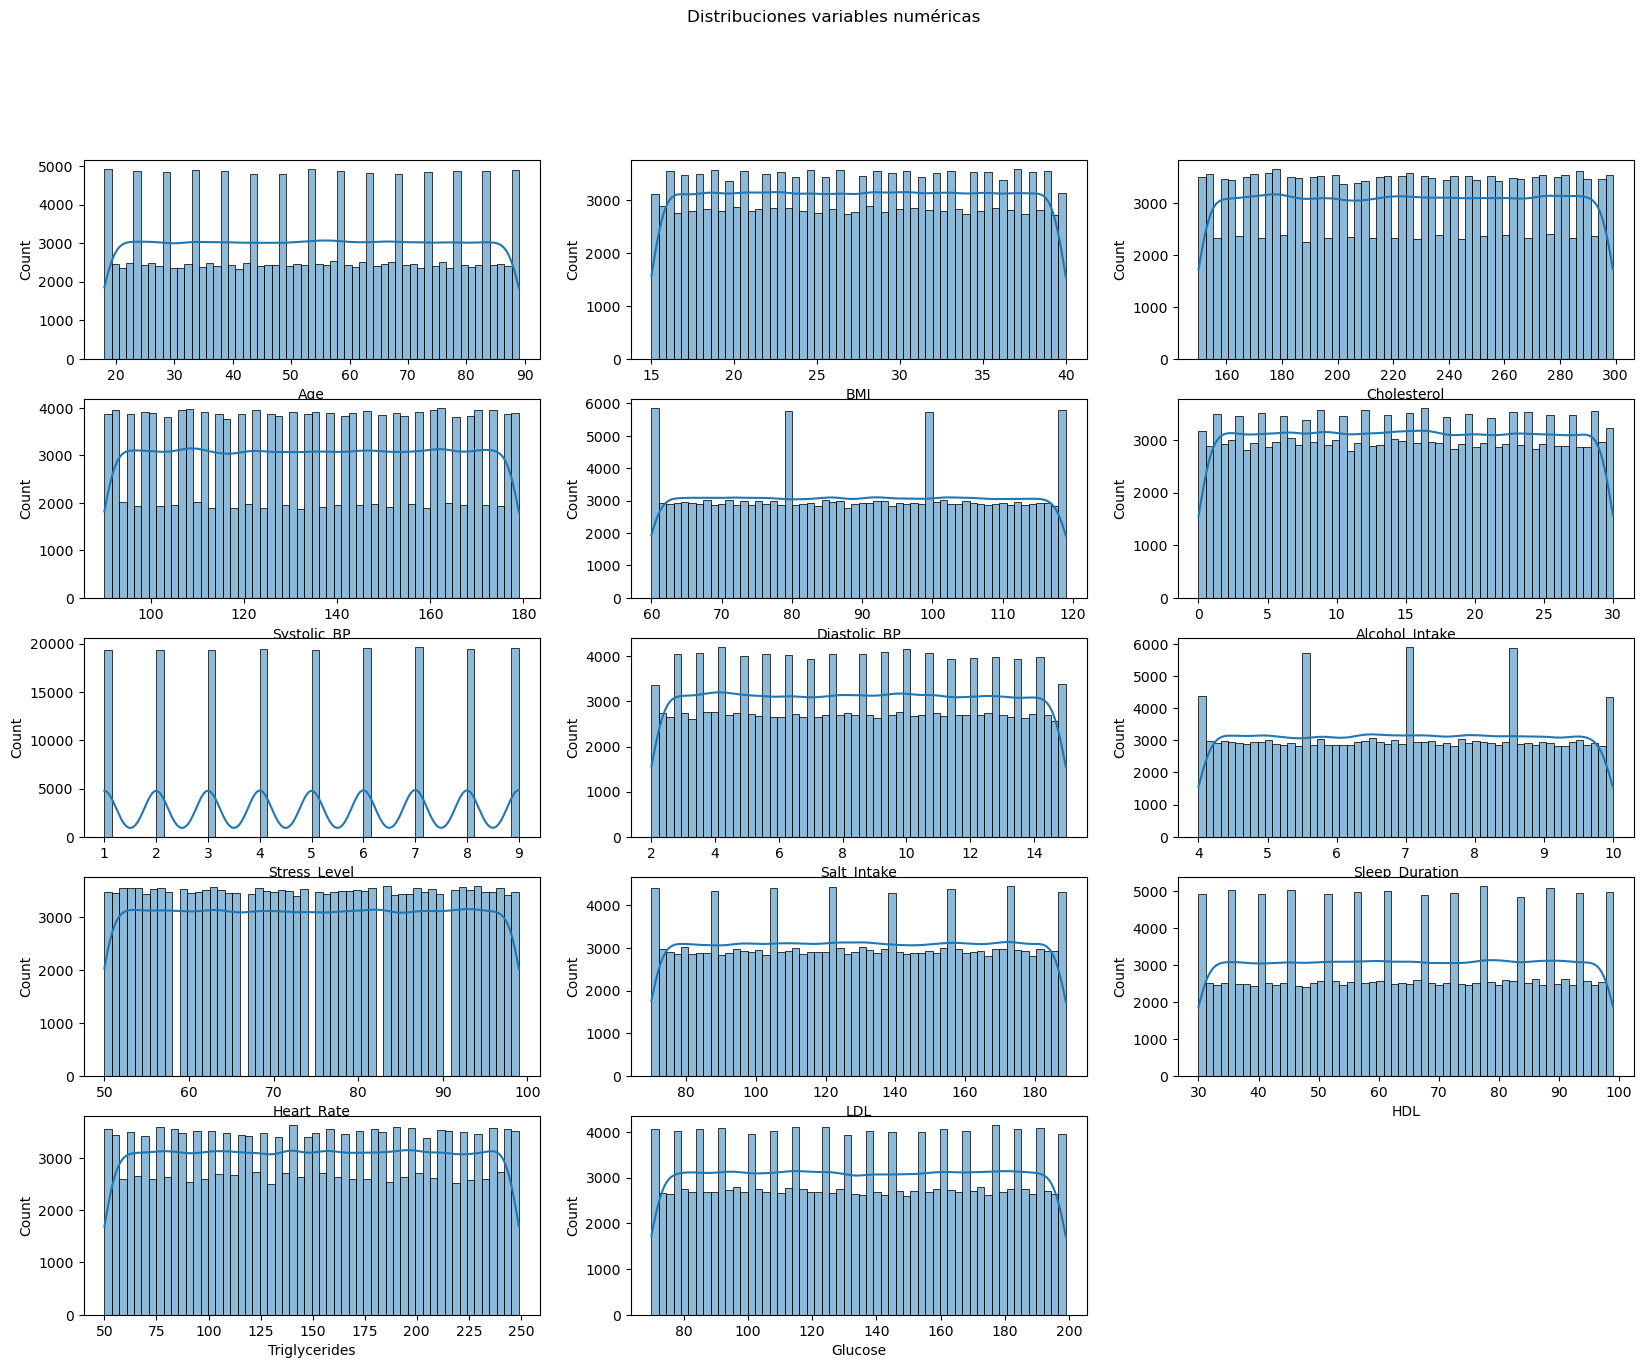

In [63]:
# Visualización variables numericas
num_rows = 5
num_columns = 3  

fig, axes = plt.subplots(num_rows,num_columns,figsize=(20,15))
axes = axes.flatten()

for i, column in enumerate(numericas.columns):
    sns.histplot(numericas[column],ax=axes[i],kde=True)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Distribuciones variables numéricas")

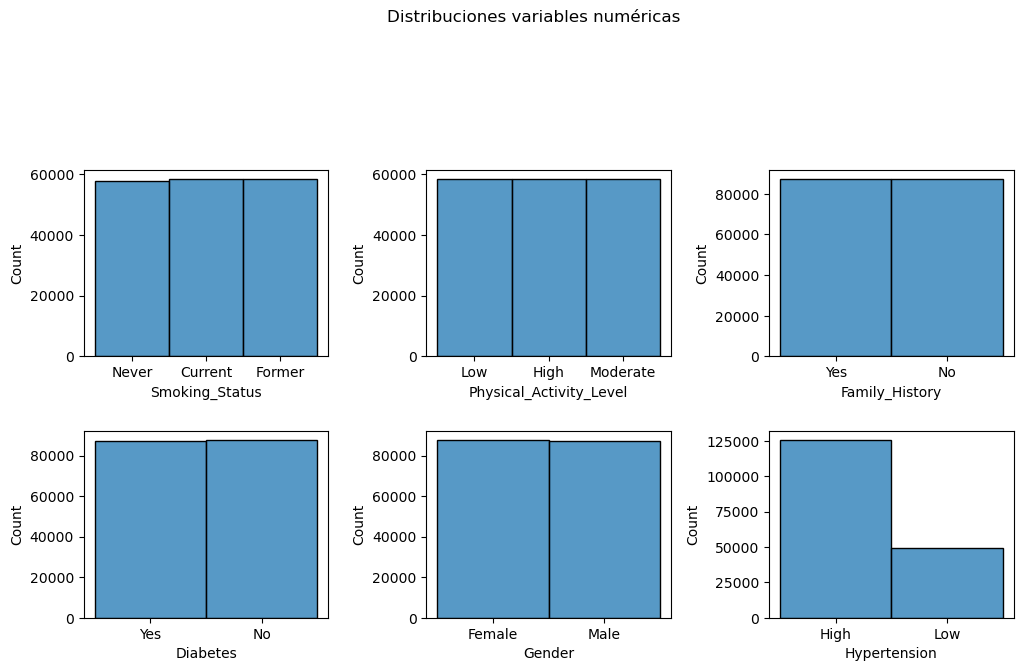

In [64]:
# Visualización variables categóricas

num_rows = 5
num_columns = 3  

fig, axes = plt.subplots(num_rows,num_columns,figsize=(12,16))
axes = axes.flatten()

for i, column in enumerate(categoricas.columns):
    sns.histplot(categoricas[column],ax=axes[i])
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Distribuciones variables numéricas")
plt.subplots_adjust(wspace=0.4, hspace=0.4)

### Transformación variables categóricas

Debemos otorgar números a las variables categóricas que tengan cierto sentido. Para ello, otorgaremos los siguientes valores: ç

* Smoking_Status = Never(0),Former(1),Current(2)
* Physical_Activity_Level = High(0), Moderate(1), Low(2)
* Family_History = Yes(1), No(0)
* Diabetes = Yes(1), No(0)
* Gender = Female (0), Male(1)
* Hypertension = High (1), Low(0)

In [66]:
data["Smoking_Status"] = data["Smoking_Status"].map({"Never":0,"Former":1,"Current":2})
data["Physical_Activity_Level"] = data["Physical_Activity_Level"].map({"High":0,"Moderate":1,"Low":2})
data["Family_History"] = data["Family_History"].map({"Yes":1,"No":0})
data["Diabetes"] = data["Diabetes"].map({"Yes":1,"No":0})
data["Gender"] = data["Gender"].map({"Male":1,"Female":0})
data["Hypertension"] = data["Hypertension"].map({"High":1,"Low":0})
data.head()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,Diabetes,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Hypertension
0,58,29.5,230,160,79,0,27.9,2,1,1,9,14.7,6.1,80,100,75,72,179,0,1
1,34,36.2,201,120,84,0,27.5,0,1,1,6,10.8,9.8,56,77,47,90,113,1,1
2,73,18.2,173,156,60,2,1.8,0,1,1,5,6.5,5.2,75,162,56,81,101,1,0
3,60,20.3,183,122,94,0,11.6,1,1,1,6,4.0,7.5,71,164,93,94,199,0,1
4,73,21.8,296,91,97,0,29.1,1,1,0,6,8.4,5.0,52,108,74,226,157,0,1


### Entrenamiento del modelo

In [68]:
X = data.drop(["Hypertension"],axis=1)
y = data["Hypertension"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123456789) 

In [70]:
modelo = RandomForestClassifier()

In [71]:
modelo.fit(X_train,y_train)

RandomForestClassifier()

### Evaluación del Modelo

In [83]:
test_predicciones = modelo.predict(X_test)
test_predicciones

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [86]:
accuracy_score = accuracy_score(test_predicciones,y_test)
accuracy_score

0.7201638251262025

Nuestro modelo predice con un 72% de precisión.